In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
game_df = pd.read_csv('vgsales.csv')

In [100]:
growth = game_df[["Year","Global_Sales"]].groupby("Year").sum()

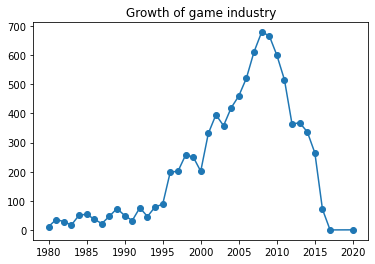

In [170]:
plt.plot(growth.index,growth["Global_Sales"],marker = 'o')
plt.title("Growth of game industry");

In [85]:
t1 = game_df[["Year","Genre","Global_Sales"]].groupby(["Year","Genre"]).sum().unstack(0).idxmax()
t2 = game_df[["Year","Genre","Global_Sales"]].groupby(["Year","Genre"]).sum().groupby(["Year"]).max()
t1.reset_index(level = 0,inplace = True,drop = True)
t1.name="Genre"
t2.name="Sales"
best_genre_overtime = pd.concat([t1, t2], axis=1)

In [92]:
best_genre_overtime.head()

,Genre,Global_Sales
Year,,
1980.0,Shooter,7.07
1981.0,Action,14.84
1982.0,Puzzle,10.03
1983.0,Platform,6.93
1984.0,Shooter,31.10


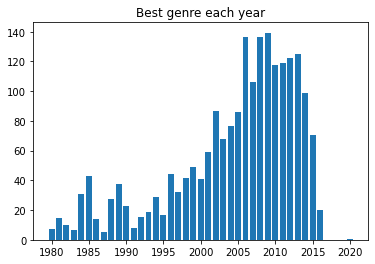

In [133]:
plt.bar(best_genre_overtime.index,best_genre_overtime["Global_Sales"])
plt.title("Best genre each year");

In [176]:
b_genres = best_genre_overtime["Genre"].unique()
games_db = game_df[["Year","Genre","Name"]].groupby(["Year","Genre"]).size().unstack(1).fillna(0)

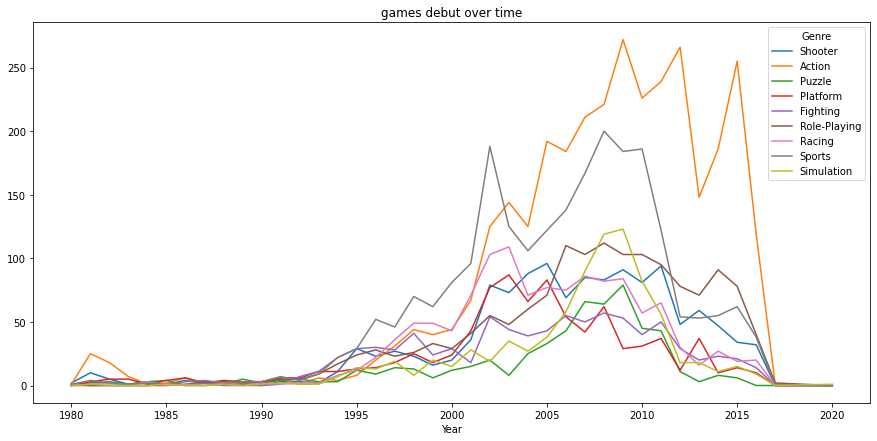

In [177]:
games_db[b_genres].plot(figsize = (15,7))
plt.title("games debut over time");

In [187]:
games_sale = game_df[["Year","Genre","Global_Sales"]].groupby(["Year","Genre"]).sum().unstack(1).fillna(0)
games_sale.columns = games_sale.columns.droplevel(0)

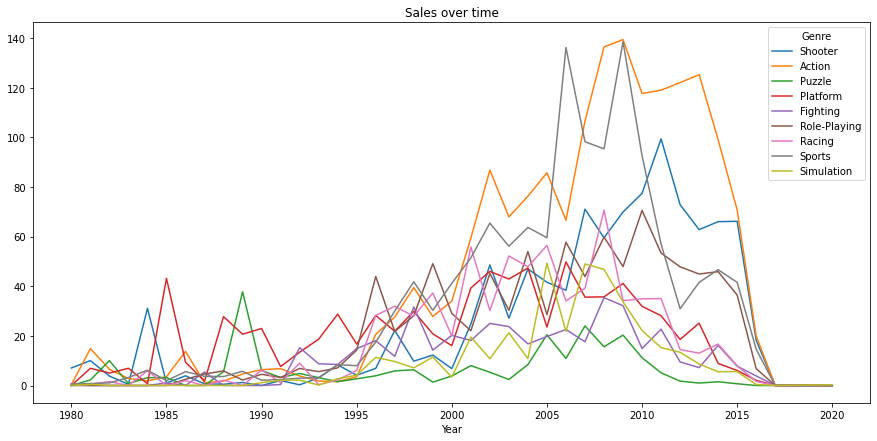

In [188]:
games_sale[b_genres].plot(figsize = (15,7))
plt.title("Sales over time");

In [201]:
plat_db = game_df[["Year","Platform","Name"]].groupby(["Year","Platform"]).size().unstack(1).fillna(0)
top_plat = plat_db.sum(axis=0).sort_values(axis=0, ascending=False).head(10).index

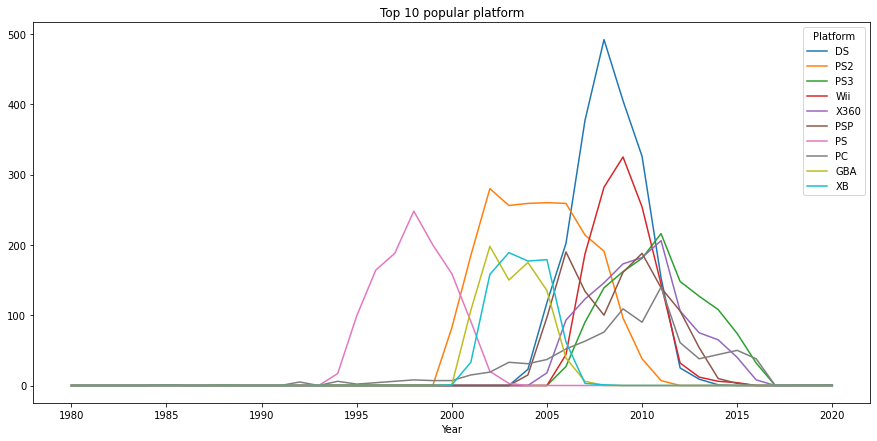

In [203]:
plat_db[top_plat].plot(figsize = (15,7))
plt.title("Top 10 popular platform");